In [1]:
#%pylab
from VORTEX.Tools.misc import cart2pol
import VORTEX.Tools.img_processing as impro
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# input parameter
N = 2**10               # sampling
Plim = 1.5              # size of the pupil for display, in radii
Flim = 100              # size of the image for display, in lam/D
vmin, vmax = -2, 6      # colorbar limits
# sampling
R = int(np.sqrt(N*np.pi))
def round_to_odd(x):
    x1 = x + 0.5
    n = int(x1)
    if not (n % 2):
        n += 1 if int(x1) == int(x) else -1
    return n
D = round_to_odd(2*R)   # pupil sampling
#lamD = N/D              # number of samples in the image plane corresponding to
#                        # lambda f-number
print('npupil = %s'%D)

npupil = 113


In [3]:
# create lambda functions for fourier transforms
fft = lambda x: np.fft.fftshift(np.fft.fft2(np.fft.fftshift(x)))
ifft = lambda x: np.fft.fftshift(np.fft.ifft2(np.fft.fftshift(x)))

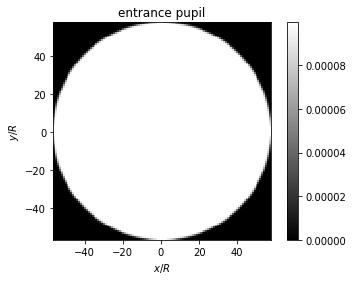

In [4]:
""" Entrance pupil """
pup_range = np.arange(-1, 1, 2/N) + 1/N
xi,yi = np.meshgrid(pup_range, pup_range)
zi = xi + 1j*yi
ri = np.abs(zi)
ti = np.angle(zi)
PP = (ri<=1).astype(int)
PP = impro.resize_img(np.float32(PP), D)
flux = np.sum(abs(PP))
PP /= flux
plt.imshow(abs(PP), origin='lower', cmap="gray", extent=[-D/2,D/2+1,-D/2,D/2+1])
plt.colorbar()
plt.title('entrance pupil')
plt.xlabel('$x/R$');plt.ylabel('$y/R$');

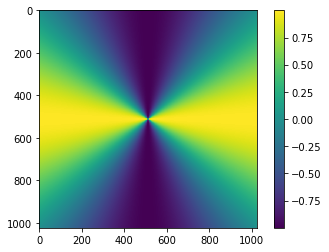

In [5]:
# perfect vortex phase ramp
V = np.exp(1j*2*ti)
plt.imshow(np.real(V))
plt.colorbar()

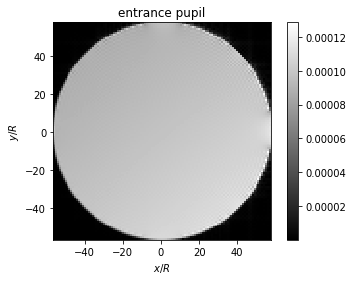

In [6]:
#modified pupil
PP_pad = impro.pad_img(PP, N)
LS = fft(fft(PP_pad)*V)
LS_param = 1#0.95
LS[ri*N<=D*LS_param] = 0
PP = ifft(ifft(LS)/V)
plt.figure(1)
start = int((N-D)/2)+1
end = int((N+D)/2)+1
plt.imshow(abs(PP[start:end,start:end]), origin='lower', cmap="gray", extent=[-D/2,D/2+1,-D/2,D/2+1])
#plt.imshow(abs(PP), origin='lower', cmap="gray", extent=[-D/2,D/2+1,-D/2,D/2+1])
plt.colorbar()
plt.title('entrance pupil')
plt.xlabel('$x/R$');plt.ylabel('$y/R$');

peak = 0.9881308635671587


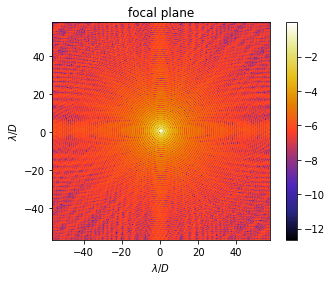

In [7]:
# focal plane
FP = fft(PP)
peak = np.max(np.abs(FP)**2)
print('peak = %s'%peak)
plt.imshow(np.log10(np.abs(FP)**2), origin='lower', cmap="CMRmap", extent=[-D/2,D/2+1,-D/2,D/2+1])
plt.colorbar()
plt.title('focal plane')
plt.xlabel('$\lambda/D$');plt.ylabel('$\lambda/D$');

rms = 0.00999879823230303


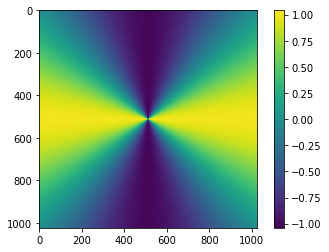

In [8]:
# measured vortex phase ramp (with error)
rms = 1e-2 # rms error in rad
noise = np.random.standard_normal(FP.shape)*rms
#noise = 0
print('rms = %s'%np.std(noise))
Verr = np.exp(1j*2*ti+noise)
plt.imshow(np.real(Verr))
plt.colorbar()

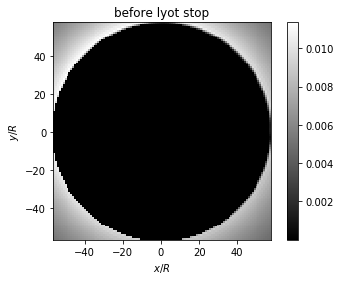

In [9]:
# before lyot stop
LS = fft(FP*Verr)/flux
start = int((N-D)/2)+1
end = int((N+D)/2)+1
plt.imshow(abs(LS[start:end,start:end]), origin='lower', cmap="gray", extent=[-D/2,D/2+1,-D/2,D/2+1])
plt.colorbar()
plt.title('before lyot stop')
plt.xlabel('$x/R$');plt.ylabel('$y/R$');

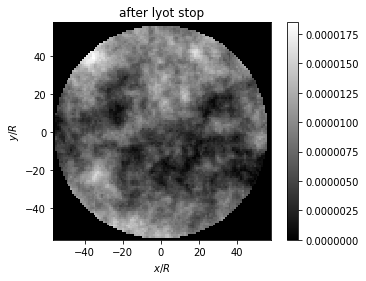

In [10]:
# after lyot stop
LS_param = 0.98
LS[ri*N>D*LS_param] = 0
plt.imshow(abs(LS[start:end,start:end]), origin='lower', cmap="gray", extent=[-D/2,D/2+1,-D/2,D/2+1])
plt.colorbar()
plt.title('after lyot stop')
plt.xlabel('$x/R$');plt.ylabel('$y/R$');

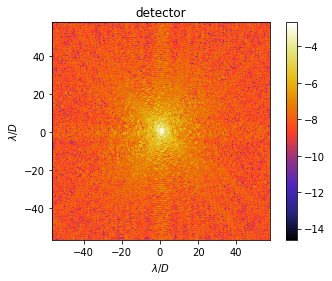

In [11]:
# detector
PSF = fft(LS)
plt.imshow(np.log10(np.abs(PSF)**2), origin='lower', cmap="CMRmap", extent=[-D/2,D/2+1,-D/2,D/2+1])
plt.colorbar()
plt.title('detector')
plt.xlabel('$\lambda/D$');plt.ylabel('$\lambda/D$');

In [12]:
np.max(np.log10(np.abs(PSF)**2))

-2.68762816180716